In [0]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding
from keras.utils import to_categorical
import numpy as np

Using TensorFlow backend.


In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
import re
import os
import glob
import string


from gensim.models import Word2Vec
from gensim.models import FastText

import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import io
import csv
from google.colab import files

In [0]:
text = files.upload()

Saving sadashidhekotha.txt to sadashidhekotha.txt


In [0]:
data_path = 'sadashidhekotha.txt'
with open(data_path, 'r', encoding='utf8') as file:
    text = file.read()

In [0]:

text = ''' কোলকাতার কলেজে পড়ে যতিশংকর। থাকে কলুটোলা প্রেসিডেনসি কলেজের মেসে। অমিত তাকে প্রায় বাড়িতে নিআয়ে আসে, খাওয়ায়, তার সঙ্গে না না বই পড়ে, না না অদ্ভুত কথায় তার মনটাকে চমকিয়ে দেয়, মোটরে করে তাকে বেড়িয়ে নিয়ে আসে।

তার পর কিছুকাল যতিশংকর অমিতর কোনো নিশ্চিত খবর পায় না। কখনো শোনে সে নৈনিতালে, কখনো উটকামন্ডে। একদিন শুনলে, অমিতর এক বন্ধু ঠাট্টা করে বলছে, সে আজকাল কেটি মিত্তিরের বাইরেকার রঙটা ঘোচাতে উঠেপড়ে লেগেছে। কাজ পেয়েছে মনের মতো, বর্ণান-র করা। এতদিন অমিত মুর্তি গড়বার শখ মেটাত কথা দিয়, আজ পেয়েছে সজীব মানুষ। সে মানুষটিও একে একে আপন উপকার রঙিন পাপড়িগুলো খসাতে রাজি, চরমে ফল ধরবে আশা করে। অমিতর বোন লিসি নাকি বলছে যে, কেটিকে একেবারে চেনাই যায় না, অর্থাৎ তাকে নাকি বডডো বেশি স্বাভাবিক দেখাচ্ছে । বন্ধুদের সে বলে দিয়েছে তাকে কেতকী বলে ডাকতে এটা তার পক্ষে নির্লজ্জতা, যে মেয়ে একদা ফিনফিনে শানি-পুরে শাড়ি পরত সেই লজ্জাবতীর পক্ষে জামা শেমিজ পরারই মতো। অমিত তাকে নাকি নিভৃতে ডাকে কেয়া বলে। এ কথাও লোকে কানাকানি করছে যে, নৈনিতালের সরোবরে নৌকো ভাসিয়ে কেটি তার হাল ধরেছে, আর অমিত তাকে পড়ে শোনাচ্ছে রবি ঠাকুরের ‘ নিরুদ্দেশ যাত্রা’। কিন’, লোকে কী না বলে? যতিশংকর বুঝে নিলে, অমিতর মনটা পাল তুলে চলে গেছে ছুটিতত্ত্বের মাঝদরিয়ায়।

অবশেষে অমিত ফিরে এল। শহরে রাষ্ট্র, কেতকীর সঙ্গে তার বিয়ে। অথচ অমিতর নিজে মুখে একদিন ও যতি এ প্রসঙ্গে শোনে নি। অমিতর ব্যবহারেও অনেকখানি বদল ঘটেছে। পূর্বের মতোই যতিকে অমিত ইংরেজী বই কিনে উপহার দেয়, কিন’ তাকে নিয়ে সন্ধেবেলায় সে সব বইয়ের আলোচনা করে না; যদি বুঝতে পারে আলোচনার ধারাটা এখন বইছে এক নতুন খাদে। আজকাল মোটরে বেড়াতে সে যতিকে ডাক পাড়ে না। যতির বয়সে এ কথা বোঝা কঠিন নয় যে, অমিতর ‘ নিরুদ্দেশ যাত্রার পার্টিতে তৃতীয় ব্যক্তির জায়গা হওয়া অসম্ভব।

যতি আর থাকতে পারলে না। অমিতকে নিজেই গায়ে পড়ে জিজ্ঞাসা করলে, ‘ অমিতদা, শুনলুম মিস্‌ মিত্রের সঙ্গে তোমার বিয়ে।’

অমিত একটু খানি চুপ করে থেকে বললে, ‘ লাবণ্য কি এ খবর জেনেছে?’

‘না, আমি তাকে লিখি নি। তোমার মুখে পাকা খবর পাই নি বলে চুপ করে আছি।’

খবরটা সত্যি, কিন’ লাবণ্য হয়তো বা ভুল বুঝবে।’

যতি হেসে বললে, ‘ এর মধ্যে ভুল বোঝবার জায়গা কোথায়? বিয়ে কর যদি তো বিয়েই করবে, সোজা কথা।’

‘দেখো যতি, মানুষের কোনো কথাটাই সোজা নয়। আমরা ডিক্‌শনারিতে যে কথার এক মানে বেঁধে দিই মানব জীবনের মধ্যে মানেটা সাতখানা হয়ে যায় সমুদ্রের কাছে এসে গঙ্গার মতো।’

যতি বললে, ‘অর্থাৎ তুমি বলছ বিবাহ মানে বিবাহ নয়?’

‘ আমি বলছি বিবাহের হাজারখানা মানে। মানুষের সঙ্গে মিশে তার মানে হয়, মানুষকে বাদ দিয়ে তার মানে বের করতে গেলইে ধাঁধা লাগে।’

‘ তোমার বিশেষ মানেটাই বলো-না।’

‘ সংজ্ঞা দিয়ে বলা যায় না, জীবন দিয়ে বলতে হয়। যদি বলি ওর মুল মানেটা ভালোবাসা তা হলেও আর একটা কথায় গিয়ে পড়ব; ভালোবাসা কথাটা বিবাহ কথার চেয়ে আরো বেশি জ্যান-।’

‘ তা হলে, অমিতদা, কথা বন্ধ করতে হয়ে যে। কথা কাঁধে নিয়ে মানের পিছন পিছন ছুটব, আর মানেটা বাঁয়ে তাড়া করলে ডাইনে আর ডাইনে তাড়া করলে বাঁয়ে মারবে দৌড়, এমন হলে তো কাজ বুজে কাজ চালিয়ে নেওয়া যায়।’ ‘ তবে কি আজকের কথাটাকে একেবারে খতম করতে হবে।’

‘ এই আলোচনাটা যদি নিতান-ই জ্ঞানের গরজে হয়, প্রাণের গরজে না হয়, তা হলে খতম করতে দোষ নেই।’

‘ ধরে নাও-না প্রাণের গরজেই।’

‘ শাবাশ, তবে শোনো।’

এই খানে একটু পাদটীকা লাগলে দোষ নেই। অমিতর ছোটো বোন লিসির স্বহস্তে ঢালা চা যতি আজকাল মাঝে মাঝে প্রায়ই পান করে আসছে। অনুমান করা যেতে পারে যে, সেই কারনেই ওর মনে কিছুমাত্র ক্ষোভ নেই যে, অমিত ওর সঙ্গে অপরাহ্নে সাহিত্যলোচনা এবং সায়াহ্নে মোটরে করে বেড়ানো বন্ধ করেছে। অমিতকে ও সর্বন-ঃকরণের ক্ষমা করেছে।

অমিত বললে, ‘ অক্সিজেন এক ভাবে বয় হাওয়ায় অদৃশ্য থেকে, সে না হলে প্রাণ বাঁচে না, আবার অক্সিজেন আর-এক ভাবে কয়লার সঙ্গে যোগে জ্বলতে থাকে, সেই আগুন জীবনের নানা কাজে দরকার-দুটোর কোনোটাকেই বাদ দেওয়া চলে না। এখন বুঝতে পেরেছ?’

‘ সম্পূর্ণ না, তবে কিনা বোঝা বার ইচ্ছে আছে।’

‘ যে ভালোবাসা ব্যাপ্তভাবে আকাশে মুক্ত থাকে অন্তরের মধ্যে সে দেয় সঙ্গ; যে ভালোবাসা বিশেষ ভাবে প্রতিদিনের সব-কিছুতে যুক্ত হয়ে থাকে সংসারে সে দেয় আসঙ্গ। দুটোই আমি চাই।’

‘ তোমার কথা ঠিক বুঝছি কি না সেইটেই বুঝতে পারি নে। আর-একটু স্পষ্ট করে বলো অমিতদা।’

অমিত বললে, ‘ একদিন আমার সমস্ত ডানা মেলে পেয়েছিলুম আমার ওড়ার আকাশ; আজ আমি পেয়েছি আমার ছোট্টো বাসা, ডানা গুটিয়ে বসেছি। কিন’ আমার আকাশও রইল।’

‘ কিন্তু বিবাহে তোমার ঐ সঙ্গ-আসঙ্গ কি একত্রেই মিলতে পারে না?’

‘ জীবনে অনেক সুযোগ ঘটতে পারে, কিন্তু ঘটে না। যে মানুষ অর্ধেক রাজত্ব আর রাজকন্যা একসঙ্গেই মিলিয়ে পায় তার ভাগ্য ভালো; যে তা না পায়, দৈবক্রমে তার যদি ডান দিক থেকে মেলে রাজত্ব আর বাঁ দিকে থেকে মেলে রাজকন্যা, সেও বড়ো কম সৌভাগ্য নয়।’

‘ কিন্তু-’

‘ কিন্তু তুমি যাকে মনে কর রোমানস্‌ সেইটেতে কমতি পড়ে! একটুও না। গল্পের বই থেকেই রোম্যানসের বাঁধা বরাদ্দ ছাঁচে ঢালাই করে জোগাতে হবে নাকি? কিছুতেই না। আমার রোমানস আমিই সৃষ্টি করব। আমার স্বর্গেও রয়ে ঘেল রোম্যানস, আমার মর্তেও ঘটাব রোম্যানস। যারা ওর একটাকে বাঁচাতে গিয়ে আর একটাকে দেউলে করে দেয় তাদেরই তুমি বল রোম্যান্টিক! তার হয় মাছের মতো জলে সাঁতার দেয়, নয় বেড়ালের মতো ডাঙায় বেড়ায়, নয় বাদুড়ের মতো আকাশে ফেরে। আমি রোম্যানসের পরমহংস। ভালোবাসার সত্যকে আমি একই শক্তিতে জলে স’লেও উপলব্ধি করব, আবার আকাশেও। নদীর চরে রইল আমার পাকা দখল, আবার মানসের দিকে যখন যাত্রা করব সেটা হবে আকাশের ফাঁকা রাস্তায়। জয় হোক আমার লাবণ্যর, জয় হোক আমার কেতকীর, আর সব দিক থেকেই ধন্য হোক অমিত রায়।’

যতি স্তব্ধ হয়ে বসে রইল, বোধ করি কথাটা তার ঠিক লাগনা। অমিত তার মুখ দেখেই ঈষৎ হেসে বললে, ‘ দেখো ভাই, সব কথা সকলের নয়। আমি যা বলছি হয়তো সেটা আমারই কথা। সেটাকে তোমার কথা বলে বুঝতে গেলেই ভুল বুঝবে, আমাকে গাল দিয়ে বসবে। একের কথার উপর আরের মানে চাপিয়েই পৃথিবীতে মারামারি খুনোখুনি হয়। এবার আমার নিজের কথাটা স্পষ্ট করেই না হয় তোমাকে বলি। রূপক দিয়েই বলতে হবে, নইলে এ-সব কথার রূপ চলে যায়, কথাগুলো লজ্জিত হয়ে ওঠে। কেতকীর সঙ্গে আমার সম্বন্ধ ভালোবাসারই; কিন’ সে যেন ঘড়ায় তোলা জল প্রতিদিন তুলব, প্রতিদিন ব্যবহার করব। আর লাবণ্যর সঙ্গে আমার ভালোবাসা সে রইল দিঘি; সে ঘরে আনবার নয়, আমার মন তাতে সাঁতার দেবে।’

যতি একটু কুন্ঠিত হয়ে বললে, ‘ কিন্তু অমিতদা, দুটোর মধ্যে একটাকেই বেছে নিতে হয় না?’

‘ যার হয় তারই হয়, আমার হয় না।’

‘ কিন্তু শ্রীমতী কেতকী যদি-’

‘ তিনি সব জানেন। সম্পূর্ণ বোঝেন কি না বলতে পারি নে। কিন্তু সমস্ত জীবন দিয়ে এইটেই তাঁকে বোঝাব যে, তাঁকে কোথাও ফাঁকি দিচ্ছে নে। এও তাঁকে বুঝতে হবে যে লাবণ্যর কাছে তিনি ঋণী।’

‘ তা হোক, শ্রীমতী লাবণ্যকে তো তোমার বিয়ের খবর জানাতে হবে।’

‘ নিশ্চয় জানাব। কিন্তু তার আগে একটি চিঠি দিতে চাই, সেটি তুমি পৌছিয়ে দেবে?’

‘ দেব।’

অমিতর এই চিঠি-

সেদিন সন্ধেবেলায় রাস্তায় শেষে এসে যখন দাঁড়ালুম, কবিতা দিয়ে যাত্রা শেষ করেছি। আজও এসে থামলুম একটা রাস্তার শেষে। এই মুহুর্তটির উপর একটি কবিতা রেখে যেতে চাই। আর- কোনো কথার ভার সইবে না। হতভাগা নিবারণ চক্রবর্তীটা যেদিন ধরা পড়ছে সেদিন মরেছে, অতি শৌখিন জলচর মাছের মতো। তাই উপায় না দেখে তোমারই কবির উপর ভার দিলুম আমার শেষ কথাটা তোমাকে জানাবার জন্যে-

তব অন্তর্ধানপটে হেরি তব রূপ চিরন্তন,
অন্তরে অলক্ষ্যলোকে তোমার অন্তিম আগমন।

লভিয়াছি চিরস্পর্শমণি,

আমার শূন্যতা তুমি পূর্ণ করি গিয়েছ আপনি।

জীবন আঁধার হলে সেইক্ষনে পাইনু সন্ধান

সন্ধ্যার দেউলদীপ চিত্তের মন্দিরে তব দান।

বিচ্ছেদের হোমবহ্নি হতে

পূজামুর্তি ধরি প্রেম দেখা দিল দুঃখের আলোতে।

–মিতা
তার পরেও আরো কিছুকাল গেল। সেদিন কেতকী গেছে তার বোনের মেয়ের অন্নপ্রাশনে। অমিত গেল না। আরাম-কেদারায় বসে সামনে চৌকিতে পা-দুটো তুলে দিয়ে বিলিয়ম জেমসের পত্রাবলী পড়ছে। এমন সময় যতিশংকর লাবণ্যর লেখা এক চিঠি তার হাতে দিলে। চিঠির এক পাতে শোভনলালের সঙ্গে লাবণ্যর বিবাহের খবর। বিবাহ হবে ছ মাস পরে, জৈষ্ঠ্য মাসে, রামগড়পর্বতের শিখরে। অপর পাতে-

কালের যাত্রার ধ্বনি শুনিতে কি পাও?
তারি রথ নিত্যই উধাও

জাগাইছে অন্তরীক্ষে হৃদয়স্পন্দন-

চক্রে পিষ্ট আঁধারের বক্ষ ফাটা তারার ক্রন্দন।

ওগো বন্ধু,

সেই ধাবমান কাল

জড়ায়ে ধরিল মোরে ফেলি তার জাল-

তুলে নিল দ্রুত রথে

দুঃসাহসী ভ্রমনের পথে

তোমা হতে বহু দূরে।

মনে হয় অজস্র মৃত্যুরে

পার হয়ে আসিলাম

আজি নব প্রভাতের শিখরচুড়ায়;

রথের চঞ্চল বেগ হাওয়ায় উড়ায়

আমার পুরানো নাম।

ফিরিবার পথ নাহি;

দুর হতে যদি দেখ চাহি

পারিবে না চিনিতে আমায়।

হে বন্ধু বিদায়।

কোনোদিন কর্মহীন পূর্ণ অবকাশে

বসন-বাতাসে

অতীতের তীর হতে যে রাত্রে বহিবে দীর্ঘশ্বাস,

ঝরা বকুলের কান্না ব্যতিবে আকাশ,

সেই ক্ষনে খুঁজে দেখো, কিছু মোর পিছে রহিল সে

তোমার প্রাণের প্রানে-; বিস্মৃতি প্রদোষে

হয়তো দিবে সে জ্যোতি,

হয়তো ধরিবে কভু নামহারা স্বপ্নের মুরতি।

তবু সে তো স্বপ্ন নয়,

সব চেয়ে সত্য মোর, সেই মৃত্যুঞ্জয়-

সে আমার প্রেম,

তারে আমি রাখিয়া এলেম

অপরিবর্তন অর্ঘ্য তোমার উদ্দেশ্যে।

পরিবর্তনের স্রোতে আমি যাই ভেসে

কালের যাত্রায়।

হে বন্ধু, বিদায়।

তোমার হয় নি কোনো ক্ষতি।

মর্তের মৃত্তিকা মোর, তাই দিয়ে অমৃতমুরতি

যদি সৃষ্টি করে থাক, তাহারি আরতি

হোক তব সন্ধ্যাবেলা-

পুজার সে খেলা

ব্যাঘাত পাবে না মোর প্রত্যহের ম্লানস্পর্শ লেগে;

তৃষার্ত আবেগবেগে

ভ্রষ্ট নাহি হবে তার কোনো ফুল নৈবেদ্যের থালে।

তোমার মানস ভোজে সযত্নে সাজালে

যে ভাবরসের পাত্র বাণীর তৃষায়

তার সাথে দিব না মিশায়ে

যা মোর ধুলির ধন, যা মোর চক্ষের জলে ভিজে।

আজও তুমি নিজে

হয়তো বা করিবে রচন

মোর স্মৃতিটুকু দিয়ে স্বপ্নবিষ্ট তোমার বচন।

ভার তার না রহিবে, না রহিবে দায়।

হে বন্ধু, বিদায়।

মোর লাগি করিয়ো না শোক-

আমার রয়েছে কর্ম, আমার রয়েছে বিশ্বলোক।

মোর পাত্র রিক্ত হয় নাই,

শূন্যের করিব পূর্ণ, এই ব্রত বহিব সদাই।

উৎকন্ঠ আমার লাগি কেহ যদি প্রতীক্ষিয়া থাকে

সেই ধন্য করিবে আমাকে।

শুক্লপক্ষ হতে আনি

রজনীগন্ধার বৃন্তখানি

যে পারে সাজাতে

অর্ঘ্যথালা কৃষ্ণপক্ষ রাতে,

যে আমারে দেখিবারে পায়

অসীম ক্ষমায়

ভালোমন্দ মিলায়ে সকলি,

এবার পূজায় তারি আপনারে দিতে চাই বলি।

তোমারে যা দিয়েছিনু তার

পেয়েছে নিঃশেষ অধিকার।

হেথা মোর তিলে তিলে দান,

করুণ মুহুর্তগুলি গন্ডুষ ভরিয়া করে পান

হৃদয় অঞ্জলি হতে মম।

ওমো তুমি নিরুপম,

হে ঐশ্বর্য্যবান,

তোমারে যা দিয়েছিনু সে তোমারি দান;

গ্রহন করেছ যত ঋণী তত করেছ আমায়।

হে বন্ধু বিদায়। '''
words = text.split()
# print(words)

# Make lines of 4 words each, moving one word at a time
seq_length = 4

lines = []
for i in range(seq_length, len(words)+1):
  lines.append(' '.join(words[i-seq_length:i]))

#print('lines : {}'.format(lines))
  
# Instantiate a Tokenizer, then fit it on the lines
tokenizer = Tokenizer()
tokenizer.fit_on_texts(lines)

print(tokenizer)

# Turn lines into a sequence of numbers
sequences = tokenizer.texts_to_sequences(lines)
print("Lines: \n {} \n Sequences: \n {}".format(lines[:5],sequences[:5]))
print(sequences)

np_sequences = np.asarray(sequences)
np_sequences


Lines: 
 ['কোলকাতার কলেজে পড়ে যতিশংকর।', 'কলেজে পড়ে যতিশংকর। থাকে', 'পড়ে যতিশংকর। থাকে কলুটোলা', 'যতিশংকর। থাকে কলুটোলা প্রেসিডেনসি', 'থাকে কলুটোলা প্রেসিডেনসি কলেজের'] 
 Sequences: 
 [[925, 924, 53, 230], [924, 53, 230, 36], [53, 230, 36, 231], [230, 36, 231, 232], [36, 231, 232, 233]]
[[925, 924, 53, 230], [924, 53, 230, 36], [53, 230, 36, 231], [230, 36, 231, 232], [36, 231, 232, 233], [231, 232, 233, 234], [232, 233, 234, 7], [233, 234, 7, 19], [234, 7, 19, 235], [7, 19, 235, 236], [19, 235, 236, 237], [235, 236, 237, 238], [236, 237, 238, 239], [237, 238, 239, 3], [238, 239, 3, 13], [239, 3, 13, 2], [3, 13, 2, 2], [13, 2, 2, 70], [2, 2, 70, 53], [2, 70, 53, 2], [70, 53, 2, 2], [53, 2, 2, 240], [2, 2, 240, 104], [2, 240, 104, 3], [240, 104, 3, 241], [104, 3, 241, 242], [3, 241, 242, 30], [241, 242, 30, 71], [242, 30, 71, 10], [30, 71, 10, 19], [71, 10, 19, 243], [10, 19, 243, 72], [19, 243, 72, 244], [243, 72, 244, 3], [72, 244, 3, 245], [244, 3, 245, 105], [3, 245, 105, 73], [2

array([list([925, 924, 53, 230]), list([924, 53, 230, 36]),
       list([53, 230, 36, 231]), ..., list([923, 229, 219, 54]),
       list([229, 219, 54, 35]), list([219, 54, 35, 69])], dtype=object)

In [0]:
vocab_size = len(tokenizer.word_counts) + 1
vocab_size

926

In [0]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=8, input_length=3))
model.add(LSTM(32))
model.add(Dense(32, activation='relu'))
model.add(Dense(vocab_size, activation='softmax'))
model.summary()





Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 3, 8)              7408      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                5248      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 926)               30558     
Total params: 44,270
Trainable params: 44,270
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [0]:
np_sequences = np.array(sequences)
pain = pad_sequences(np_sequences)

np_sequences


array([list([925, 924, 53, 230]), list([924, 53, 230, 36]),
       list([53, 230, 36, 231]), ..., list([923, 229, 219, 54]),
       list([229, 219, 54, 35]), list([219, 54, 35, 69])], dtype=object)

In [0]:
pain

array([[  0, 925, 924,  53, 230],
       [  0, 924,  53, 230,  36],
       [  0,  53, 230,  36, 231],
       ...,
       [  0, 923, 229, 219,  54],
       [  0, 229, 219,  54,  35],
       [  0, 219,  54,  35,  69]], dtype=int32)

In [0]:
np.shape(pain)

(1557, 5)

In [0]:
pain=np.delete(pain,0,1)


In [0]:
pain=np.delete(pain,0,1)
pain=np.delete(pain,0,1)
pain=np.delete(pain,0,1)
pain=np.delete(pain,0,1)
pain

array([], shape=(1557, 0), dtype=int32)

In [0]:
X = pain[:,:3]

In [0]:
y = pain[:,3]


In [0]:
y = to_categorical(y, num_classes=vocab_size)


In [0]:
history = model.fit(X,y,epochs=1, verbose=0)

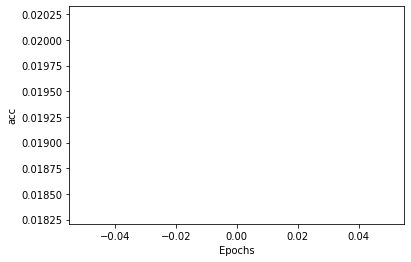

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
	plt.plot(history.history[string])
	plt.xlabel('Epochs')
	plt.ylabel(string)
	plt.show()
	
plot_graphs(history, 'acc')

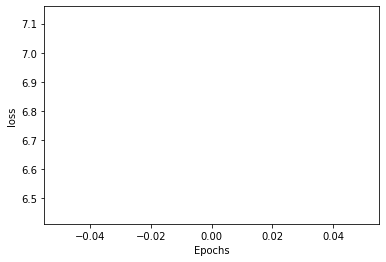

In [0]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
	plt.plot(history.history[string])
	plt.xlabel('Epochs')
	plt.ylabel(string)
	plt.show()
	
plot_graphs(history, 'loss')

In [0]:
def predict_text(test_text):
  if len(test_text.split())!=3:
    print('Text input should be 3 words!')
    return False
  
  # Turn the test_text into a sequence of numbers
  test_seq = tokenizer.texts_to_sequences([test_text])
  test_seq = np.array(test_seq)
  # print('test_seq : {}'.format(test_seq))
  # test_seq : [[6 4 1]]
  
  # Get the model prediction from the test_seq
  pred = model.predict(test_seq).argmax(axis=1)[0]
  # print('pred : {}'.format(pred))
  # pred : 7
  
  # Return the word associated to the prediction
  return tokenizer.index_word[pred]

In [0]:
text = 'বাংলাদেশ কবে'
predict_text(text)

'‘'

In [0]:
text = 'বাংলাদেশ কবে'
print(text, end = ' ')
story = [text]
for i in range(82):
  result = predict_text(text)
  print(result,end = ' ')
  if i%10 == 0 and i!=0:
    print(result)
  story.append(result)
  #print('result : {}'.format(result))
  text += ' ' + result
  #print('new text : {}'.format(text))
  text = ' '.join(text.split()[1:])
  

story = " ".join(str(x) for x in story)
print(story)